<a href="https://colab.research.google.com/github/jagvgithub/LAOM/blob/main/fuzzy_sistem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sistema Experto de Diagnóstico de Averías en Electrodomésticos

## Razonamiento Aproximado

## Jose Antonio Gómez Vargas

## 1. Propuesta de Dominio y Uso Inteligente

**Dominio:** Diagnóstico de Averías en Electrodomésticos

**Objetivo:** Desarrollar un sistema experto que pueda ayudar a identificar posibles averías en electrodomésticos, como lavadoras, neveras o microondas, basándose en síntomas reportados por el usuario.

**Alcance:**

- El sistema evaluará síntomas reportados por el usuario y sugerirá posibles averías.
- Proporcionará recomendaciones para la reparación o el mantenimiento básico que el usuario puede realizar.

**Límites:**

- El sistema no reemplaza a un técnico profesional; proporciona diagnósticos preliminares basados en síntomas.
- No cubrirá todos los posibles electrodomésticos ni todas las posibles averías, solo un conjunto limitado.

## 2. Reglas Imprecisas sobre el Dominio

Aquí están las 5 reglas borrosas para el diagnóstico de averías en electrodomésticos:

1. Si el electrodoméstico hace un ruido fuerte y no enciende, entonces la posible avería es "Problema con el motor" con alta probabilidad.

2. Si el electrodoméstico no enfría y hay un sonido de goteo, entonces la posible avería es "Fuga de refrigerante" con una probabilidad media.

3. Si el electrodoméstico funciona pero no calienta y la luz de advertencia está encendida, entonces la posible avería es "Problema con el termostato" con alta probabilidad.

4. Si el electrodoméstico emite un olor quemado y hay humo, entonces la posible avería es "Cortocircuito" con alta probabilidad.

5. Si el electrodoméstico vibra excesivamente y no gira correctamente, entonces la posible avería es "Problema con el tambor" con probabilidad media.

## 3. Ejemplo de Razonamiento Aproximado con Reglas (Representación No Continua)

**Entrada:**

- Ruido: Fuerte
- Encendido: No

**Reglas:**

- Regla 1: Si el ruido es fuerte (0.8) y no enciende (1.0), entonces "Problema con el motor" (0.8).

**Proceso de Inferencia:**

- **Función de Implicación:** Usamos la t-norma mínima (t-norma de Zadeh) para combinar las condiciones de la regla.
  
  $Implicación = min(0.8, 1.0) = 0.8$


**Conclusión:** La probabilidad de "Problema con el motor" es 0.8.


## 4. Ejemplo de Razonamiento Aproximado con Números Borrosos y Mecanismo Mamdani

**Entrada:**

- Ruido: Fuerte (número borroso: [0.7, 0.9])
- Encendido: No (número borroso: [0.9, 1.0])

**Reglas:**

- Regla 1: Si el ruido es fuerte y no enciende, entonces "Problema con el motor".

**Representación Borrosa:**

- Ruido fuerte: [0.7, 0.9]
- No encendido: [0.9, 1.0]

**Mecanismo Mamdani:**

- **Función de Implicación:** Usamos la t-norma mínima:
  \[
  \text{Implicación} = \min([0.7, 0.9], [0.9, 1.0]) = [0.7, 0.9]
  \]

- **Función de Agregación:** Se agregan los valores de pertenencia de la conclusión para las reglas aplicables.


# Base de Conocimientos (BC)

Las reglas del sistema experto para el diagnóstico de averías en electrodomésticos están definidas como sigue:

```clips
(defrule Regla1
  (y (Ruido Fuerte) (Encendido No))
  =>
  (assert (Averia (Tipo "Problema con el motor") (Probabilidad 0.8)))
)

(defrule Regla2
  (y (Enfriamiento No) (Sonido Goteo))
  =>
  (assert (Averia (Tipo "Fuga de refrigerante") (Probabilidad 0.5)))
)

(defrule Regla3
  (y (Funciona Si) (Calienta No) (LuzAdvirtiendo Si))
  =>
  (assert (Averia (Tipo "Problema con el termostato") (Probabilidad 0.8)))
)

(defrule Regla4
  (y (Olor Quemado) (Humo Si))
  =>
  (assert (Averia (Tipo "Cortocircuito") (Probabilidad 0.8)))
)

(defrule Regla5
  (y (Vibracion Excessiva) (Gira No Correctamente))
  =>
  (assert (Averia (Tipo "Problema con el tambor") (Probabilidad 0.5)))
)


# Base de Hechos (BH)

Los hechos iniciales para el sistema experto están definidos de la siguiente manera:

```clips
(assert (y (Ruido Fuerte) (Encendido No)))
(assert (y (Enfriamiento No) (Sonido Goteo)))
(assert (y (Funciona Si) (Calienta No) (LuzAdvirtiendo Si)))
(assert (y (Olor Quemado) (Humo Si)))
(assert (y (Vibracion Excessiva) (Gira No Correctamente)))


# Ejercicio de aplicación

In [ ]:
!pip install scikit-fuzzy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 14.4 MB/s eta 0:00:00


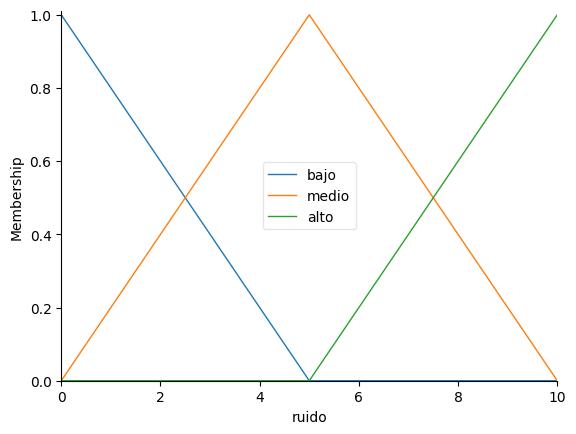

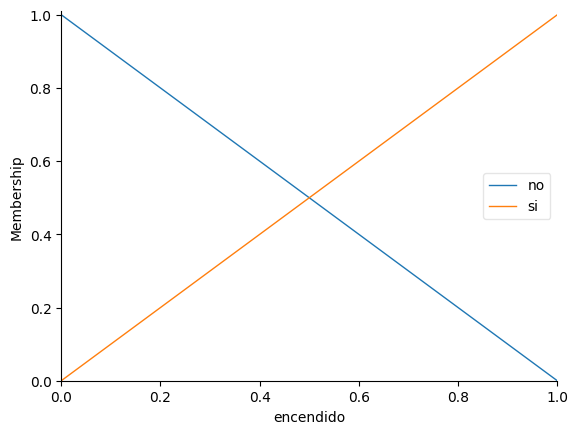

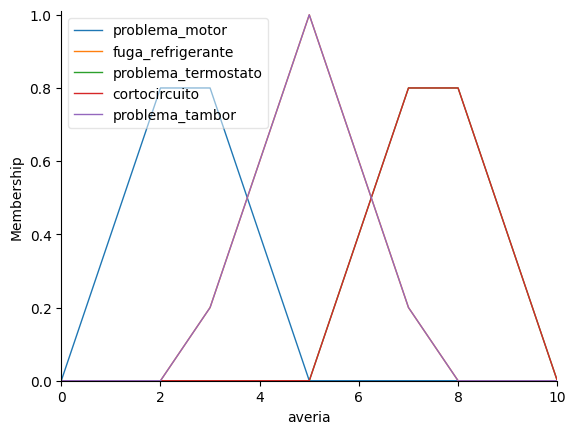

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Crear variables de entrada y salida
ruido = ctrl.Antecedent(np.arange(0, 11, 1), 'ruido')
encendido = ctrl.Antecedent(np.arange(0, 2, 1), 'encendido')
averia = ctrl.Consequent(np.arange(0, 11, 1), 'averia')

# Funciones de membresía para ruido
ruido['bajo'] = fuzz.trimf(ruido.universe, [0, 0, 5])
ruido['medio'] = fuzz.trimf(ruido.universe, [0, 5, 10])
ruido['alto'] = fuzz.trimf(ruido.universe, [5, 10, 10])

# Funciones de membresía para encendido
encendido['no'] = fuzz.trimf(encendido.universe, [0, 0, 1])
encendido['si'] = fuzz.trimf(encendido.universe, [0, 1, 1])

# Funciones de membresía para averia
averia['problema_motor'] = fuzz.trimf(averia.universe, [0, 2.5, 5])
averia['fuga_refrigerante'] = fuzz.trimf(averia.universe, [2.5, 5, 7.5])
averia['problema_termostato'] = fuzz.trimf(averia.universe, [5, 7.5, 10])
averia['cortocircuito'] = fuzz.trimf(averia.universe, [5, 7.5, 10])
averia['problema_tambor'] = fuzz.trimf(averia.universe, [2.5, 5, 7.5])

# Reglas difusas
rule1 = ctrl.Rule(ruido['alto'] & encendido['no'], averia['problema_motor'])
rule2 = ctrl.Rule(ruido['medio'] & encendido['no'], averia['fuga_refrigerante'])
rule3 = ctrl.Rule(ruido['bajo'] & encendido['si'], averia['problema_termostato'])
rule4 = ctrl.Rule(ruido['alto'] & encendido['si'], averia['cortocircuito'])
rule5 = ctrl.Rule(ruido['medio'] & encendido['si'], averia['problema_tambor'])

# Sistema de control difuso
averia_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])
averia_sim = ctrl.ControlSystemSimulation(averia_ctrl)

# Visualizar funciones de membresía
ruido.view()
encendido.view()
averia.view()
plt.show()


# ejemplo de inferencia

Resultado de la inferencia: 3.61


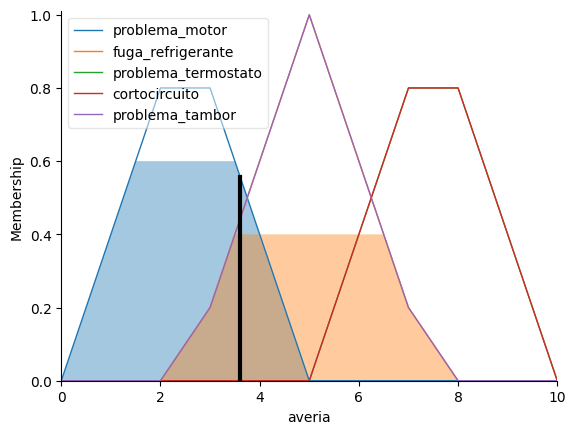

In [ ]:
# Definir valores de entrada
entrada_ruido = 8  # Ejemplo: Ruido alto
entrada_encendido = 0  # Ejemplo: No enciende

# Pasar los valores al sistema de inferencia
averia_sim.input['ruido'] = entrada_ruido
averia_sim.input['encendido'] = entrada_encendido

# Ejecutar el sistema
averia_sim.compute()

# Mostrar el resultado
print(f"Resultado de la inferencia: {averia_sim.output['averia']:.2f}")
averia.view(sim=averia_sim)
plt.show()


---
Cierre del ejercicio

---